Necessary Imports:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

Data Uploading:


1.   Reads data from JSON
2.   Extracts time information (0-23)
3.   Converts time to minutes

In [22]:
def load_data(file_path):
   df = pd.read_json(file_path)
   df['endTime'] = pd.to_datetime(df['endTime'])
   df['day'] = df['endTime'].dt.day
   df['minutes_played'] = df['msPlayed'] / (1000 * 60)
   return df

Creating Graphs:

1.   Calculates hourly listening totals
2.   Creates bar charts

In [27]:
def plot_daily_averages(df):
   plt.style.use('seaborn-v0_8')
   plt.figure(figsize=(15, 6))

   # Günlük ortalamalar
   daily_avg = df.groupby('day')['minutes_played'].mean()

   # Bar chart
   daily_avg.plot(kind='bar')
   plt.title('Average Daily Listening Time')
   plt.xlabel('Day of Month')
   plt.ylabel('Average Minutes')
   plt.grid(True, alpha=0.3)
   plt.tight_layout()
   plt.show()

Main Function:

1.   Loads data and plots graphs with error handling


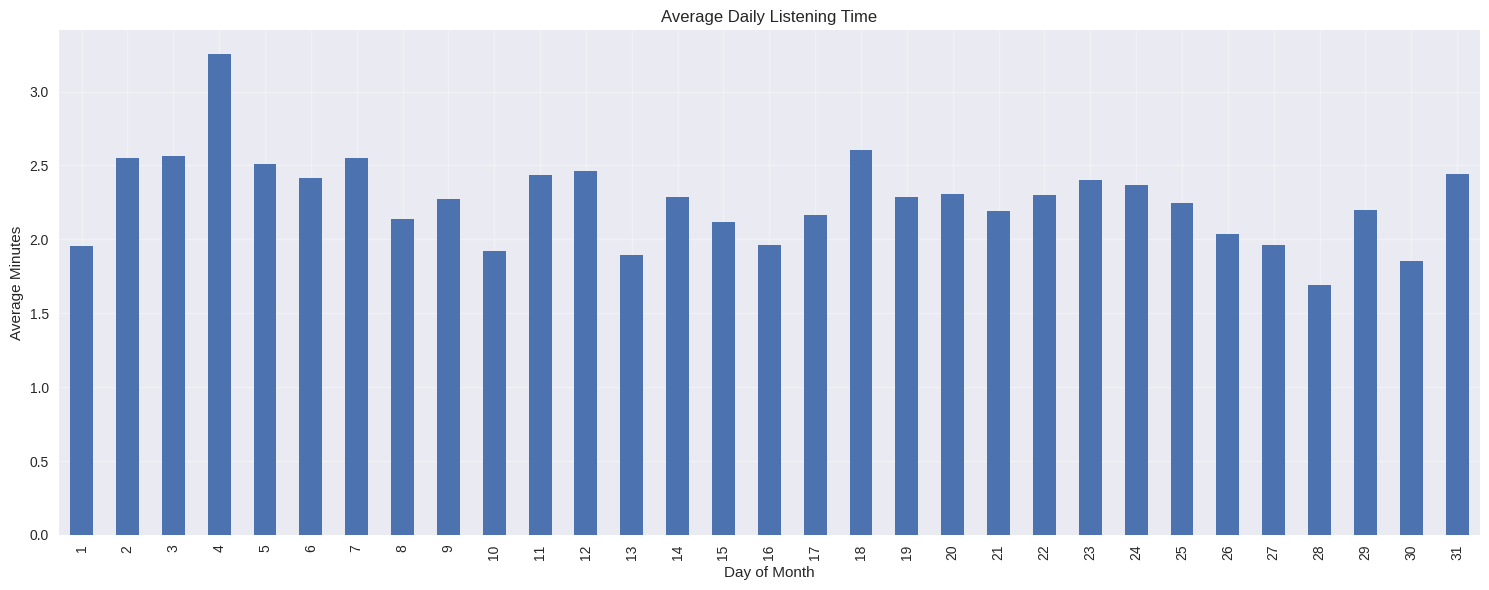

In [28]:

def main():
   try:
       df = load_data("StreamingHistory_music_0.json")
       plot_daily_averages(df)
   except Exception as e:
       print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
   main()